In [179]:
import nltk
import random
from nltk.corpus import movie_reviews
import pickle
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from nltk import word_tokenize
from nltk.corpus import stopwords
import json
import pandas as pd
import geopandas as gpd
import pylab as pl
import numpy as np
import json
from geopandas import GeoDataFrame as gdf
from shapely.geometry import Point
import proba_maps
import sklearn
%matplotlib inline


In [8]:
#nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/cusp/pa1303/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/cusp/pa1303/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/cusp/pa1303/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/cusp/pa1303/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/cusp/pa1303/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/cusp/pa1303/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]

True

In [2]:
documents = [(list(movie_reviews.words(fileid)), category) for category in movie_reviews.categories() 
for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

In [147]:
all_words = []
for w in movie_reviews.words():
    if w not in stopwords.words("english"):
        all_words.append(w.lower())

KeyboardInterrupt: 

In [10]:
all_words = nltk.FreqDist(all_words)

In [11]:
print(all_words.most_common(15))

[(',', 77717), ('.', 65876), ("'", 30585), ('"', 17612), ('-', 15595), (')', 11781), ('(', 11664), ('film', 9517), ('one', 5852), ('movie', 5771), ('?', 3771), ('like', 3690), (':', 3042), ('even', 2565), ('good', 2411)]


In [12]:
word_features = list(all_words.keys())[:3000]
#word_features = [word for word in word_features if word not in stopwords.words("english")]

In [13]:
#A word is only a feature if it is contained in the list of all_words


def find_features(document):
    words = set(document[0])
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [14]:
# A dictionary that contains all words and if each word was contained in the document
#followed by if the document was a pos/neg review
featuresets = [(find_features(rev), category) for (rev, category) in documents]
training_data = featuresets[:1900]
testing_data = featuresets[1900:]

In [139]:
MNBclassifier = SklearnClassifier(MultinomialNB()).train(training_data)
print("accuracy: {}".format((nltk.classify.accuracy(MNBclassifier, testing_data))*100))

accuracy: 47.0


## import the tweets

In [30]:
user_jsons = []
with open("data/2017-11-19_Police_tweets.json", 'r') as f:
    for line in f:
        while True:
            try:
                jfile = json.loads(line)
                break
            except ValueError:
                # Not yet a complete JSON value
                line += next(f)
        user_jsons.append(jfile)

In [31]:
#tweets = []
#for i in range(len(user_jsons)):
#    b = user_jsons[i]['text']
#    tweets.append(b)

In [64]:
#tweets1 = tweets[:200]

In [67]:
data = proba_maps.make_gdf(user_jsons)

In [76]:
def join_dfs(map_file, gdf):
    base = gpd.read_file(map_file)
    gdf = gdf.to_crs(base.crs)
    joined = gpd.sjoin(base, gdf, op='intersects', how='inner')
    return joined

In [77]:
cali_tweets = join_dfs("data/ca_counties/CA_Cities_TIGER2016.shp", data)

In [81]:
#test_tweets = cali_tweets.tweets.tolist()

In [88]:
#tweet_test_data = [(find_features(word_tokenize(i)), i) for i in test_tweets]
tweet_test_data = [find_features(word_tokenize(i)) for i in test_tweets]

In [133]:
tweet_test_data[0]

{'peculiarly': False,
 'nbsp': False,
 'mastabatory': False,
 'somebody': False,
 'urinals': False,
 'complacent': False,
 'priviledge': False,
 'planet': False,
 'beesley': False,
 'helm': False,
 'ronin': False,
 'canada': False,
 'evangelical': False,
 'raided': False,
 'prided': False,
 'racers': False,
 'katie': False,
 'hurlyburly': False,
 'ney': False,
 'altering': False,
 'bursts': False,
 'ladyship': False,
 'teaming': False,
 'betrayals': False,
 'flighty': False,
 'morissette': False,
 'colours': False,
 'booming': False,
 'contort': False,
 'minstrel': False,
 'wonsuk': False,
 'backdoors': False,
 'reinforcement': False,
 'corniest': False,
 'govworks': False,
 'prepubescent': False,
 'wade': False,
 'paralleled': False,
 'energies': False,
 'crusades': False,
 'awkward': False,
 'figuring': False,
 'stresses': False,
 'deserves': False,
 'boiling': False,
 'stocks': False,
 'seltzer': False,
 '700': False,
 'reevaluation': False,
 'nicholas': False,
 'remaning': False,
 

# Fix Issues

In [148]:
documents[0]

(['warren',
  'beatty',
  "'",
  's',
  '"',
  'bulworth',
  '"',
  'is',
  'a',
  'caustic',
  'political',
  'comedy',
  'that',
  'doesn',
  "'",
  't',
  'attack',
  'any',
  'particular',
  'political',
  'group',
  ',',
  'but',
  'rather',
  'the',
  'ingrained',
  'insincerity',
  'that',
  'has',
  'infected',
  'the',
  'american',
  'political',
  'system',
  '.',
  'some',
  'might',
  'think',
  'this',
  'film',
  'is',
  'vulgar',
  ',',
  'and',
  'in',
  'many',
  'ways',
  'it',
  'is',
  '.',
  'however',
  ',',
  'as',
  'loud',
  'and',
  'raucous',
  'as',
  'it',
  'is',
  ',',
  '"',
  'bulworth',
  '"',
  'speaks',
  'the',
  'truth',
  ',',
  'which',
  'is',
  'almost',
  'always',
  'ugly',
  'to',
  'hear',
  '.',
  'beatty',
  ',',
  'who',
  'directed',
  'the',
  'film',
  'and',
  'co',
  '-',
  'wrote',
  'the',
  'script',
  'with',
  'jeremy',
  'pikser',
  '(',
  '"',
  'the',
  'lemon',
  'sisters',
  '"',
  ')',
  ',',
  'stars',
  'as',
  'incumb

In [173]:
from sklearn.feature_extraction.text import TfidfTransformer

In [166]:
docs = [movie_reviews.raw(fileid) for category in movie_reviews.categories() 
for fileid in movie_reviews.fileids(category)]

cat = [category for category in movie_reviews.categories() 
for fileid in movie_reviews.fileids(category)]

In [170]:
mydict = {'reviews' : docs, 'label': cat}
movies = pd.DataFrame(mydict)

In [169]:
from sklearn.feature_extraction.text import CountVectorizer

In [171]:
movie_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features = 3000)
movie_counts = movie_vec.fit_transform(movies.reviews)

In [172]:
movie_vec.vocabulary_.get('screen')

2289

In [174]:
tfidf_transformer = TfidfTransformer()
movie_tfidf = tfidf_transformer.fit_transform(movie_counts)

In [181]:
from sklearn.cross_validation import train_test_split
docs_train, docs_test, y_train, y_test = train_test_split(
    movie_tfidf, movies.label, test_size = 0.20, random_state = 12)

In [182]:
clf = MultinomialNB().fit(docs_train, y_train)

In [183]:
y_pred = clf.predict(docs_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

0.81000000000000005

In [185]:
y_proba = clf.predict_proba(docs_test)

In [187]:
tweets_counts = movie_vec.transform(cali_tweets.tweets)
tweets_tfidf = tfidf_transformer.transform(tweets_counts)

In [193]:
pred = clf.predict(tweets_tfidf)

In [190]:
pred_proba = clf.predict_proba(tweets_tfidf)

In [199]:
vals = np.array(pred_proba)

In [202]:
cali_tweets['positivity'] = vals[:, 1]

In [203]:
cali_tweets.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,index_right,name,tweets,positivity
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,A,2499183617,76073827,+38.4500114,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...,293,DJ_Squintz,Baddest man on the planet djcharlieramos \n#dj...,0.430900
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,A,2499183617,76073827,+38.4500114,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...,638,sactraffic,Animal Hazard: I5 S at just north of Laguna Bl...,0.480834
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,A,2499183617,76073827,+38.4500114,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...,755,MangeshGunjal,"Ran a Spartan Super Race, Sacramento 2017.\nAn...",0.506476
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,A,2499183617,76073827,+38.4500114,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...,1596,tmj_sac_health,"If you're looking for work in #RanchoCordova, ...",0.447861
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,A,2499183617,76073827,+38.4500114,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...,2244,NationsCapitol,Imposing structure. #ranchocordova #sacramento...,0.487122


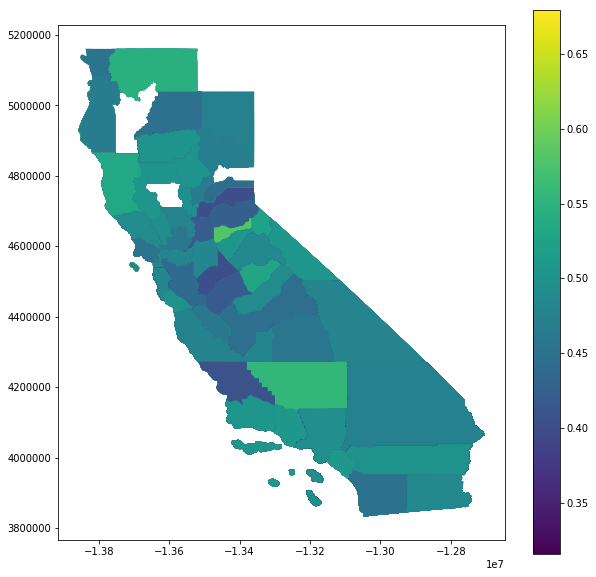

In [206]:
cali_tweets.plot(column='positivity', figsize=(10, 10), legend=True)

In [ ]:
#classify geolocated tweets and get the probability of each classifier and color code to map check to see 
#if keywords in tweet. plot as points